# Import the packages

In [32]:
import numpy as np
import cv2
import random
import matplotlib.pyplot as plt
import PIL
from PIL import Image
import tensorflow as tf
import sklearn
from sklearn.preprocessing import StandardScaler

# Plot a sample of data

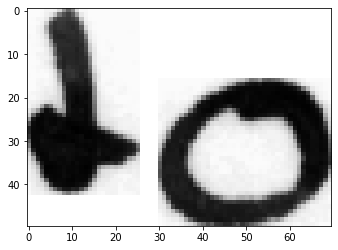

(50, 70)


In [10]:
path = 'data/words/a01/a01-000u/a01-000u-00-03.png'

img = Image.open(path)
npimg = np.array(img)

plt.imshow(npimg, cmap='gray')
plt.show()

print(npimg.shape)

# Preprocessing

In [35]:
def preprocess(img, imgSize, dataAugmentation=False):
    
    #img --> numpy array representing the image you aim preprocessed
    #imgSize --> [_,_] list of length 2, representing the size of the output img
    #dataAugmentation --> rezise the input img
    
    
    
    # Prevent the damaged files in the dataset, return black image instead
    
    if img is None:
        img = np.zeros([imgSize[1], imgSize[0]])

    # increase dataset size by applying random stretches to the images
    
    if dataAugmentation:
        stretch = (random.random() - 0.5) # -0.5 .. +0.5
        wStretched = max(int(img.shape[1] * (1 + stretch)), 1) # random width, but at least 1
        img = cv2.resize(img, (wStretched, img.shape[0])) # stretch horizontally by factor 0.5 .. 1.5

    # create target image and copy sample image into it
    
    (wt, ht) = imgSize
    (h, w) = img.shape
    fx = w / wt
    fy = h / ht
    f = max(fx, fy)
    newSize = (max(min(wt, int(w / f)), 1), max(min(ht, int(h / f)), 1)) # scale according to f (result at least 1 and at most wt or ht)
    img = cv2.resize(img, newSize)
    target = np.ones([ht, wt]) * 255
    target[0:newSize[1], 0:newSize[0]] = img

    # transpose for TF
    
    img = cv2.transpose(target)

    # normalize using sklearn.preprocessing package
    
    #scaler = StandardScaler()
    #img = scaler.fit_transform(img)
    
    #normalize
    
    (m, s) = cv2.meanStdDev(img)
    m = m[0][0]
    s = s[0][0]
    img = img - m
    img = img / s if s>0 else img
    return img

    #the output is a numpy array representing the image, the image has been rescaled without modifying the proportions, transpose and normalize for training the model

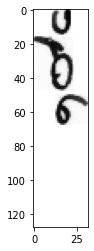

[[0.39183215 0.39183215 0.39183215 ... 0.39183215 0.39183215 0.39183215]
 [0.39183215 0.39183215 0.39183215 ... 0.39183215 0.39183215 0.39183215]
 [0.39183215 0.39183215 0.39183215 ... 0.39183215 0.39183215 0.39183215]
 ...
 [0.39183215 0.39183215 0.39183215 ... 0.39183215 0.39183215 0.39183215]
 [0.39183215 0.39183215 0.39183215 ... 0.39183215 0.39183215 0.39183215]
 [0.39183215 0.39183215 0.39183215 ... 0.39183215 0.39183215 0.39183215]]
(128, 32)


In [36]:
path = 'data/words/a01/a01-000u/a01-000u-00-03.png'

img = np.array(Image.open(path))

img2 = preprocess(img, [128,32])

plt.imshow(img2, cmap = "gray")
plt.show()

print(img2)

print(img2.shape)

# Create the model

In [ ]:
class CustomModel(tf.keras.Model):
    
    def __init__(self):
        super(CustomModel, self).__init__()
        
        #Insert Convolution layers
        
        self.convolution1 = tf.keras.layers.Conv2D(_,_, activation = 'relu', name = "convolution1" )
        self.convolution2 = tf.keras.layers.Conv2D(_,_, activation = 'relu', name = "convolution2" )
        self.convolution3 = tf.keras.layers.Conv2D(_,_, activation = 'relu', name = "convolution3" )
        self.convolution4 = tf.keras.layers.Conv2D(_,_, activation = 'relu', name = "convolution4" )
        self.convolution5 = tf.keras.layers.Conv2D(_,_, activation = 'relu', name = "convolution5" )
        
        #Insert LSTM (RNN) layers
        
        self.rnn_layer1 = tf.keras.layers.LSTM(_, return_sequences = True, stateful = True, name = 'rnn_layer1')
        self.rnn_layer2 = tf.keras.layers.LSTM(_, return_sequences = True, stateful = True, name = 'rnn_layer2') 
    
    
    def call(self,image)